<a href="https://colab.research.google.com/github/CHARLIE1210-A/Learning-ML-Basic/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classification**

Problems where each input must be assigned a discrete category(also called label or class) are known as classification.

Here are Some examples of classificartion problem:
*  Rainfall Prediction
*  Breast Cancer Detection
*  Loan Repayment Prediction
*  Handwritten Digit Recognition




**Logistic Regression for solving classification problems**

* we take linear combination (or weighted sum of the input features)
* we apply the sigmoid function to the result to obtain a numbeer between 0 and 1
* this number represents the probability of the input being classified as "Yes"
* instead of RMSE ,the cross entropy loss function is used to evaluate the results

### Installing Dependencies

In [ ]:
!pip install scikit-learn opendatasets -U -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 36.1 MB/s eta 0:00:00


In [ ]:
!pip install pandas numpy -q

### Dowloading the datasets

In [ ]:
import opendatasets as od

In [ ]:
od.version()

'0.1.22'

In [ ]:
dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'

In [ ]:
od.download(dataset_url)

100%|██████████| 3.83M/3.83M [00:00<00:00, 139MB/s]

In [ ]:
import os
data_dir = '/content/weather-dataset-rattle-package'

In [ ]:
os.listdir(data_dir)

['weatherAUS.csv']

In [ ]:
data = data_dir + '/weatherAUS.csv'

## Analysis and Visualizing

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(data)

In [ ]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


**The dataset contains over 1,45,000 rows and 23 columns .The dataset contains date ,numeric and categorical columns.our objective is to create a model to predict the value in the column 'RainTommorow'**

In [ ]:
# Lets check the data-types and missing values in the various columns.
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be able to fill in missing values for most columns ,it might be a good idea to discard the rows where the value of 'RainTommorow' or 'RainToday' is missing to make our analysis and model simpler (since one of them is the target variable and the other is likely to be very closel related t the target variable.

In [ ]:
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [ ]:
!pip install plotly matplotlib seaborn -q

In [ ]:
from ast import increment_lineno
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
px.histogram(raw_df,x='Location',title='Location vs RainyDays',color='RainToday')

In [ ]:
px.histogram(raw_df,x='Temp3pm',title='Temperature at 3 PM vs RainTomorrow',color='RainTomorrow')

In [ ]:
px.histogram(raw_df,x='RainTomorrow',color='RainToday',title='Rain Tomorrow vs Rain Today')

In [ ]:
px.scatter(raw_df.sample(2000),title='Min Temp vs Max Temp',x='MinTemp',y='MaxTemp',color='RainToday')

In [ ]:
px.scatter(raw_df.sample(2000),title='Temp 3PM vs Humidity 3PM',x='Temp3pm',y='Humidity3pm',color='RainTomorrow')

## Data Processing

**Identifying Input and Target Columns**

Often not all columns in a dataset are useful for training a model .In the current dataset,we can ignore the 'Date' column,since we only want to weather conditions to make a prediction about whether it will rain the next day.

In [ ]:
# Input Column
input_cols = list(raw_df.columns[1:-1])

In [ ]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [ ]:
# Output columns
target_cols = 'RainTomorrow'

In [ ]:
target_cols

'RainTomorrow'

**Let's now identify which of the columns are numerical and which ones are categorical.This will be useful later,as we'll nedd to convert the categorigical data to numbers for training a logistics regression model.**

In [ ]:
!pip install numpy -q

In [ ]:
import numpy as np

In [ ]:
numeric_cols = raw_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df[input_cols].select_dtypes('object').columns.tolist()

**Let's View some statistics for the numeric columns**

In [ ]:
raw_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


**Let's also check the number of categories in each of the categorical columns.**

In [ ]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

 **Imputing Missing Numeric Data**

ML models can't work with missing numerical data.The process of filling missing values is called ***imputation***.

There are various techniques for imputation ,but we'll use the most basic one;replacing missing values with the average value in the column using the ***SimpleImputer*** class from ***sklearn.impute.***

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

**Before we perform imputation ,let's check the no of missing values in each column.**

In [ ]:
raw_df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

**The first step in imputation is to 'fit' the imputer to data i.e compute the chosen statics (eg mean) for each column in the dataset.**

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

**After calling 'fit' ,the computed statics for each column is stored in the 'statistics_' property of' imputer'**

In [ ]:
list(imputer.statistics_)

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

**The missing values in the numeric column sets can be filled in using the 'transform' method of 'imputer'.**

In [ ]:
raw_df[numeric_cols] = imputer.transform(raw_df[numeric_cols])

**The Missing values are now filled with  the mean of each column.**

In [ ]:
raw_df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

**Scaling Numeric Features**

Another good practice is to scale numeric features to a small range of values e.g (0,1) or (-1,1). Scaling numeric features ensures that no paticular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in pratice with smaller numbers.

Let's use 'MinMaxScaler' from 'sklearn.preprocessing' to scale values to the (0,1) range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
?MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

First we 'fit' the scaler to the data i.e compute the range of values for each numeric column.

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

**we can now inspect the minimum and maximum values in each column**

In [ ]:
print('Minimum Scaler Value:')
list(scaler.data_min_)

Minimum Scaler Value:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [ ]:
print('Maximum Scaler Value:')
list(scaler.data_max_)

Maximum Scaler Value:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

In [ ]:
raw_df[numeric_cols] = scaler.transform(raw_df[numeric_cols])

In [ ]:
raw_df[numeric_cols].head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704


In [ ]:
raw_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,0.487850,0.529964,0.006334,0.037741,0.526244,0.263337,0.107619,0.214151,0.688268,0.514493,0.614125,0.610527,0.492351,0.499917,0.510276,0.520023
std,0.150784,0.134343,0.022817,0.021926,0.189061,0.101797,0.068099,0.100214,0.189607,0.205470,0.111557,0.106920,0.253806,0.234384,0.136727,0.131916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.379717,0.429112,0.000000,0.027586,0.526244,0.193798,0.053846,0.149425,0.570000,0.370000,0.545455,0.542400,0.333333,0.444444,0.411392,0.424184
50%,0.483491,0.519849,0.000000,0.037741,0.526244,0.255814,0.100000,0.214151,0.700000,0.514493,0.614125,0.610527,0.492351,0.499917,0.506329,0.512476
75%,0.596698,0.623819,0.002156,0.037741,0.600000,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.676800,0.666667,0.666667,0.605485,0.608445
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Encoding Categorical Data**

Since ML models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use ***one-hot encoding***
for categorical columns.

One-hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [ ]:
raw_df[categorical_cols].nunique()

Location       49
WindGustDir    17
WindDir9am     17
WindDir3pm     17
RainToday       2
dtype: int64

In [ ]:
raw_df2= raw_df[categorical_cols].fillna('Unknown')

We can perform one-hot encoding using the ***OneHotEncoder*** class from ***sklearn.preprocessing***

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
encoder.fit(raw_df2)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

We can generate columns names for each individual categorical using ***get_features_names_out***

In [ ]:
encoder_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
print(len(encoder_cols))

102


To perform the encoding ,we use the transform method of encoder.

In [ ]:
raw_df[encoder_cols] = encoder.transform(raw_df[categorical_cols])

In [ ]:
print(raw_df[categorical_cols].isnull().sum())

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
# Input Column
input_cols = numeric_cols + encoder_cols

In [ ]:
raw_df[input_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unknown,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unknown,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unknown,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
raw_df[target_cols]

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 140787, dtype: object

### Training ,Validation and Test set

**While working with dates,it's often a better idea to seperate the training, validation and test sets with time,so that the model is trained on data from the past and evaluated on data from the future.**

**For the current dataset ,we can use the Data Column in the dataset to create another column for year.we'll pick the last two years for the test set and one year before it for the validation set.**

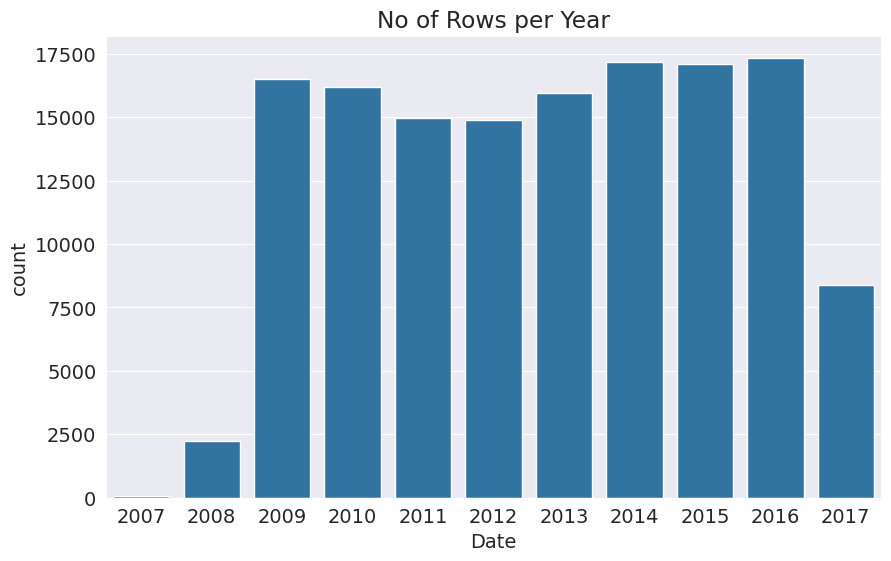

In [ ]:
plt.title('No of Rows per Year')
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year);

In [ ]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [ ]:
train_inputs = train_df[input_cols]
val_inputs = val_df[input_cols]
test_inputs = test_df[input_cols]

In [ ]:
print('Train Inputs Shape :',train_inputs.shape)
print('Validation Inputs Shape :',val_inputs.shape)
print('Test Inputs Shape :',test_inputs.shape)

Train Inputs Shape : (97988, 118)
Validation Inputs Shape : (17089, 118)
Test Inputs Shape : (25710, 118)


In [ ]:
train_target = train_df[target_cols]
val_target = val_df[target_cols]
test_target = test_df[target_cols]

In [ ]:
print('Train target Shape :',train_target.shape)
print('Validation target Shape :',val_target.shape)
print('Test target Shape :',test_target.shape)

Train target Shape : (97988,)
Validation target Shape : (17089,)
Test target Shape : (25710,)


**Training a Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols+encoder_cols],train_target)

LogisticRegression(solver='liblinear')

In [ ]:
print(model.coef_.tolist())

[[0.8986310435831582, -2.879914964510936, 3.16277770185562, 0.8542465101646303, -1.6713939517586038, 6.764401019680559, -0.942321727599129, -1.4284289075683034, 0.3228924332663022, 5.995315064220104, 5.463856765510025, -9.176804958768757, -0.16229709019708502, 1.2876596761585262, 0.47471524395691095, 2.021429503600586, 0.6016501640498816, -0.5524821074052095, 0.47814276613514417, 0.00766965564077951, 0.3468145228050993, -0.35227720511882743, 0.17971069430916792, 0.44048641115129067, -0.013981766534315494, 0.028943854443275466, 0.2581473851341608, -0.021205522156638217, -0.04279500597188526, -0.4831416876485812, -0.1375633111197264, -0.5760595598322682, -0.7875234368787923, -0.25540411019267395, -0.3288839108069863, -0.5690043941955333, 0.08183002285619907, 0.013382443311912332, 0.06412748497735833, -0.9020545503311315, -0.4443298408837363, 0.008517036245813925, -0.4606124008098094, -0.4655180699011165, -0.06949890538066067, 0.19115878962861627, 0.4504758434414625, 0.6081210644368628, 0

In [ ]:
print(model.intercept_)

[-2.44955434]


**Making Predictions**

In [ ]:
train_pred = model.predict(train_inputs)
train_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [ ]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

**We can output a probabilistic prediction using 'predict_probs'**

In [ ]:
train_props = model.predict_proba(train_inputs)

In [ ]:
train_props

array([[0.94401109, 0.05598891],
       [0.94074123, 0.05925877],
       [0.960936  , 0.039064  ],
       ...,
       [0.98749104, 0.01250896],
       [0.98334667, 0.01665333],
       [0.87453333, 0.12546667]])

**Accuracy Score**

We can test the accuracy of the model's predictions by computing the percetage of matching values in *'train_preds'* and *'train_targets'*

This is done using the ***accuracy_score*** function from ***sklearn.metrics***.

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_target,train_pred)

0.8519206433440829

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(train_target,train_pred,normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])